In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.preprocessing import minmax_scale

from numpy.random import default_rng
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
plt.style.use('seaborn') # pretty matplotlib plots
sns.set(font_scale=2)

In [2]:
# Load 3 feature version of x arrays
x_train = np.loadtxt('./data_sneaker_vs_sandal/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_sneaker_vs_sandal/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_sneaker_vs_sandal/y_train.csv', delimiter=',', skiprows=1)

In [56]:
test_x_train = x_train.reshape(12000,28,28)

opposite = []
for i in range(12000):
    test = test_x_train[i]
    left = len(test[:][:14].nonzero()[0])
    right = len(test[:][15:].nonzero()[0])
    
    if (left >= right):
        opposite.append(i)

In [57]:
len(opposite)

152

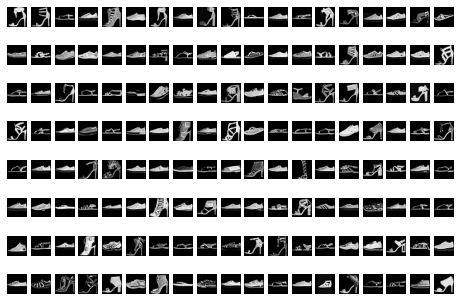

In [58]:
for i in range(len(opposite)):
    k = opposite[i]
    plt.subplot(8, 19, i + 1)
    plt.axis('off')
    plt.imshow(test_x_train[k], cmap=plt.cm.gray, vmin=0.0, vmax=1.0)

In [69]:
opposite[50]

4905

157

In [70]:
x_train_flip = x_train

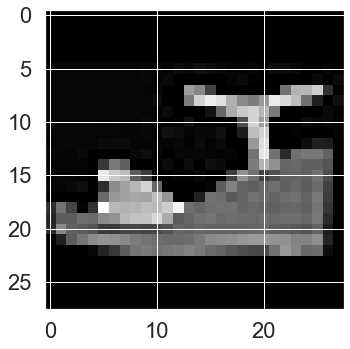

In [74]:
flipped = np.flip(x_train[4905].reshape(28,28), axis = 1)
plt.imshow(flipped.reshape(28,28), cmap=plt.cm.gray, vmin=0.0, vmax=1.0)
yes_flipped = flipped.reshape(784)

In [75]:
x_train_flip[4905] = yes_flipped 

In [80]:
thres = 0.03
x_train_ft_trans = np.zeros(12000*784).reshape(12000,784)
x_test_ft_trans = np.zeros(2000*784).reshape(2000,784)

for i in range(12000):
    for j in range(784):
        if (x_train_flip[i][j] >= thres):
            x_train_ft_trans[i][j] = 1
        else:
            x_train_ft_trans[i][j] = 0

for i in range(2000):
    for j in range(784):
        if (x_test[i][j] >= thres):
            x_test_ft_trans[i][j] = 1
        else:
            x_test_ft_trans[i][j] = 0

In [81]:
x_tr, x_va, y_tr, y_va = train_test_split(x_train_ft_trans, y_train, test_size=0.4)

In [82]:
model = LogisticRegression(solver='liblinear')
model.fit(x_tr, y_tr)

prob_tr = model.predict_proba(x_tr)
prob_va = model.predict_proba(x_va)

acc_tr = model.score(x_tr, y_tr)
acc_va = model.score(x_va, y_va)

tr_log_loss = log_loss(y_tr,prob_tr)
va_log_loss = log_loss(y_va,prob_va)

print('train log loss', tr_log_loss)
print('validation log loss', va_log_loss)


print('train acc', acc_tr)
print('validation acc', acc_va)

train log loss 0.040480274403680225
validation log loss 0.10397975876740863
train acc 0.9880555555555556
validation acc 0.963125


In [83]:
yproba1_test = model.predict_proba(x_test_ft_trans)[:, 1] 
np.savetxt('yproba1_test.txt', yproba1_test)